# Training Regression Models

## Simple Linear Regression

As seen in previous lectures, first we import the basic packages necessary fo this instruction:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Consider the data set "df" with feature variables "x" and "y" given below.

Pandas.DataFrame documentation excerpt: 
*Two-dimensional, tabular data structure with labeled axes (rows and columns). Can be thought of as a dict-like container for Series objects.*

In [2]:
df = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'y': [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]})
print(df)

   x   y
0  0   1
1  1   3
2  2   2
3  3   5
4  4   7
5  5   8
6  6   8
7  7   9
8  8  10
9  9  12


To get a first impression of the given data, let's have a look at its scatter plot:

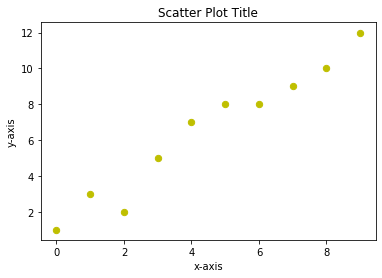

In [3]:
plt.scatter(df[['x']], df[['y']], color = "y", marker = "o", s = 40)
plt.xlabel('x-axis') 
plt.ylabel('y-axis')
plt.title('Scatter Plot Title') 
plt.show()

We can already see a linear correlation between x and y. Assume the feature x to be descriptive, while y is our target feature. We want a linear function, y=ax+b, that predicts y as accurately as possible based on x. To achieve this goal we use linear regression from the sklearn package.

In [8]:
from sklearn.linear_model import LinearRegression

#define the classifier
classifier = LinearRegression()

#train the classifier
model = classifier.fit(df[['x']], df['y'])

Now we can use the classifier to predict y. We print the predictions as well as the coefficient and intercept of the linear function.

In [9]:
#use the trained classifier to make prediction
y_pred = classifier.predict(df[['x']])
print(y_pred)

#print coefficient (a in y=ax+b) and intercept (the constant, b in y=ax+b)
print('Coefficients: \n', classifier.coef_)
print('Intercept: \n', classifier.intercept_)

[ 1.23636364  2.40606061  3.57575758  4.74545455  5.91515152  7.08484848
  8.25454545  9.42424242 10.59393939 11.76363636]
Coefficients: 
 [1.16969697]
Intercept: 
 1.2363636363636399


Let's visualize our regression function with the scatterplot showing the original data set. Herefore, we use the predicted values.

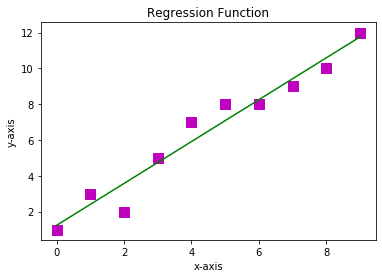

In [10]:
#visualize original data points
plt.scatter(df[['x']], df[['y']], color = "m", marker = "s", s = 100) 
#visualize regression function
plt.plot(df[['x']], y_pred, color = "g") 
plt.xlabel('x-axis') 
plt.ylabel('y-axis') 
plt.title('Regression Function')
plt.show()

### <span style="color:green"> Now it is your turn. </span> Build a simple linear regression for the data below. Use col1 as descriptive feature and col2 as target feature. Also plot your results.

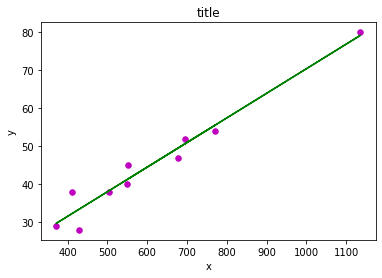

In [11]:
df2 = pd.DataFrame({'col1': [770, 677, 428, 410, 371, 504, 1136, 695, 551, 550], 'col2': [54, 47, 28, 38, 29, 38, 80, 52, 45, 40]})

#your turn - solution

#define the classifier
classifier = LinearRegression()
#train the classifier
classifier.fit(df2[['col1']], np.ravel(df2[['col2']]))

#use the classifier to make prediction
y_predict = classifier.predict(df2[['col1']])

#visualize data points
plt.scatter(df2[['col1']], df2[['col2']], color = "m", marker = "o", s = 30) 
#visualize regression function
plt.plot(df2[['col1']], y_predict, color = "g") 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('title')
plt.show()

But the model and its predictions is often not enough. Let's also compute their error. The sklearn.metrics package contains several error metrics such as

* Mean squared error
* Mean absolute error
* Mean squared log error
* Median absolute error


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean squared error:")
print(mean_squared_error(df2['col2'], y_predict))

Mean squared error:
8.89470197100567


We can also visualize our squared errors:

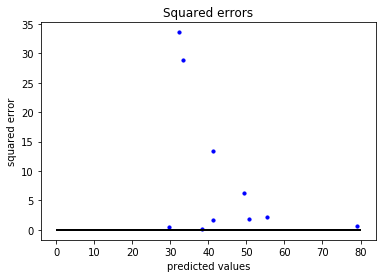

In [13]:
plt.scatter(y_predict, (df2['col2'] - y_predict) ** 2, color = "blue", s = 10,) 
plt.title("Squared errors")
## plotting line for zero error 
plt.hlines(y = 0, xmin = 0, xmax = 80, linewidth = 2) 
plt.xlabel('predicted values')
plt.ylabel('squared error')
plt.show()

### <span style="color:green"> Now it is your turn. </span> Compute the mean absolute error and visualize the absolute errors. Play around using different error metrics.

Mean absolute error: 
2.321700087515697


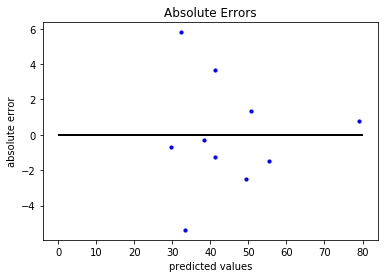

In [14]:
#Your turn
print("Mean absolute error: ")
print(mean_absolute_error(df2['col2'], y_predict))

#plot
plt.scatter(y_predict, (df2['col2'] - y_predict), color = "blue", s = 10,) 
plt.title("Absolute Errors")
plt.hlines(y = 0, xmin = 0, xmax = 80, linewidth = 2) 
plt.xlabel('predicted values')
plt.ylabel('absolute error')
plt.show()

## Handling multiple descriptive features at once - Multiple linear regression
In most cases, we will have more than one descriptive feature . As an example, we use an example data set of the scikit package. The dataset describes housing prices in Boston based on several attributes.

In [15]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston()
print(type(data)) #sklearn.utils.Bunch object

<class 'sklearn.utils.Bunch'>


To predict the housing price we will use a Multiple Linear Regression model. In Python this is very straightforward: we use the same function as for simple linear regression, where the parameter x can consist of multiple columns.

In [16]:
X = data.data #predefined descriptive features of the sklearn bunch object
y = data.target #predefined target feature of the sklearn bunch object
print(type(X))
print(type(y))

classifier2 = LinearRegression()
classifier2.fit(X,y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_predict2 = classifier2.predict(X)
print(y_predict2[0:5], '\n') #print first 5 predicted values

print('Coefficients: \n', classifier2.coef_, '\n')
print('Intercept: \n', classifier2.intercept_, '\n')
print("Mean squared error: %.2f" % mean_squared_error(y, y_predict2))

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423] 

Coefficients: 
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01] 

Intercept: 
 36.459488385089855 

Mean squared error: 21.89


## Handling categorical descriptive features
So far we always encountered numerical attributes, but data sets can also contain categorical attributes. The regression function can only handle numerical input. Therefore we need to tranform categorical data, for example using one-hot encoding as explained in the lecture: we introduce a 0/1 feature for every possible value of our categorical attribute.

There are several possibilities to achieve this in python. Here we present the *get_dummies* function of pandas.

After encoding the attributes we can apply our regular regression function.

In [21]:
df = pd.DataFrame({'A':['a','b','c'],'B':['c','b','a'] })
print(df.head(),'\n')
#one-hot encoding example using pandas
df_one_hot = pd.get_dummies(df)
print(df_one_hot.head())

   A  B
0  a  c
1  b  b
2  c  a 

   A_a  A_b  A_c  B_a  B_b  B_c
0    1    0    0    0    0    1
1    0    1    0    0    1    0
2    0    0    1    1    0    0


### <span style="color:green"> Now it is your turn. </span>  Perform linear regression using the data set given below. Don't forget to transform your categorical features. The rental price attribute represents the target feature. 

In [22]:
df = pd.DataFrame({'Size':[500,550,620,630,665],'Floor':[4,7,9,5,8], 'Energy rating':['C', 'A', 'A', 'B', 'C'], 'Rental price': [320,380,400,390,385] })

#Your turn
X = df[['Size','Floor', 'Energy rating']] #the descriptive features
y = df['Rental price'] #the target feature

print(X.head(2), '\n')
X = pd.get_dummies(X, columns = ["Energy rating"]) #using one-hot encoding on the feature 'Energy rating'
print(X.head(2), '\n')


classifier = LinearRegression()
classifier.fit(X,y)

pred = classifier.predict(X)

print('Original Values: \n', y, '\n')
print('Predicted Values: \n', pred, '\n')

print('Coefficients: \n', classifier.coef_)
print('Intercept: \n', classifier.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y, pred))

   Size  Floor Energy rating
0   500      4             C
1   550      7             A 

   Size  Floor  Energy rating_A  Energy rating_B  Energy rating_C
0   500      4                0                0                1
1   550      7                1                0                0 

Original Values: 
 0    320
1    380
2    400
3    390
4    385
Name: Rental price, dtype: int64 

Predicted Values: 
 [320. 380. 400. 390. 385.] 

Coefficients: 
 [  1.         -25.          68.33333333 -51.66666667 -16.66666667]
Intercept: 
 -63.33333333334872
Mean squared error: 0.00


## Predicting a categorical target value - Logistic regression

We might also encounter data sets where our target value is categorical. Here we don't transform them into numeric values, but we use a logistic regression function. Luckily, sklearn provides us with a suitable function that is similar to the linear equivalent. Similar to linear regression we can compute logistic regression on a single descriptive feature as well as multiple.

In [23]:
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('iris.csv') #import iris data set
print('All features: \n', df.columns.tolist()) #get feature overview

X = df[['sepal_length']] #we only use the first feature as descriptive feature
y = df['species'] #use the species as target feature
print('X: \n', X.head(), '\n')
print('y: \n', y.head(), '\n')


#defining and training the logistic regression model
classifier3 = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
classifier3.fit(X, y)

pred = classifier3.predict(X)

print('Score: \n', classifier3.score(X, y)) #the mean accuracy on the given test data and labels
print('Coefficients: \n', classifier3.coef_)
print('Intercept: \n', classifier3.intercept_)

All features: 
 ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
X: 
    sepal_length
0           5.1
1           4.9
2           4.7
3           4.6
4           5.0 

y: 
 0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object 

Score: 
 0.6933333333333334
Coefficients: 
 [[-0.86959145]
 [ 0.01223362]
 [ 0.57972675]]
Intercept: 
 [ 4.16186636 -0.74244291 -3.9921824 ]


### <span style="color:green"> Now it is your turn. </span>  In the example above we only used the first descriptive feature. Change the example to be able to handle all available descriptive features to predict the species.

In [24]:
#Your turn
df = pd.read_csv('iris.csv')

#preparing input
features = df.columns.tolist()
features.remove('species') #we use all descriptive features, but not the target feature
X = df[features]
y = df['species']
print('X: \n', X.head(), '\n')
print('y: \n', y.head(), '\n')

from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression( solver = 'liblinear', multi_class = 'ovr')
classifier3.fit(X, y)

y_pred = classifier3.predict(X)

print('Score: \n', classifier3.score(X, y))
print('Coefficients: \n', classifier3.coef_)
print('Intercept: \n', classifier3.intercept_)

X: 
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2 

y: 
 0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object 

Score: 
 0.96
Coefficients: 
 [[ 0.41021713  1.46416217 -2.26003266 -1.02103509]
 [ 0.4275087  -1.61211605  0.5758173  -1.40617325]
 [-1.70751526 -1.53427768  2.47096755  2.55537041]]
Intercept: 
 [ 0.26421853  1.09392467 -1.21470917]


# Training Support Vector Machines

Aside from regression models, the sklearn package also provides us with a function for training support vector machines. Looking at the example below we see that they can be trained in similar ways. We still use the iris data set for illustration.

In [25]:
df = pd.read_csv('iris.csv')

#prepare input data
features = df.columns.tolist()
features.remove('species')
X = df[features]
y = df['species']

from sklearn.svm import SVC

classifier = SVC(C=1, kernel='linear')
classifier.fit(X, y)

pred = classifier.predict(X)

As explained in the lecture, a support vector machine is defined by its support vectors. In the sklearn package we can access them and their properties very easily.

In [26]:
print('Indicies of support vectors: \n', classifier.support_, '\n ') #indicies of support vectors
print('Support vectors: \n ', classifier.support_vectors_, '\n ') #the support vectors
print('Number of support vectors for each class: \n ', classifier.n_support_, '\n ') #the number of support vectors for each class

Indicies of support vectors: 
 [ 23  24  41  52  56  63  66  68  70  72  76  77  83  84  98 106 110 119
 123 126 127 129 133 138 146 147 149] 
 
Support vectors: 
  [[5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [4.5 2.3 1.3 0.3]
 [6.9 3.1 4.9 1.5]
 [6.3 3.3 4.7 1.6]
 [6.1 2.9 4.7 1.4]
 [5.6 3.  4.5 1.5]
 [6.2 2.2 4.5 1.5]
 [5.9 3.2 4.8 1.8]
 [6.3 2.5 4.9 1.5]
 [6.8 2.8 4.8 1.4]
 [6.7 3.  5.  1.7]
 [6.  2.7 5.1 1.6]
 [5.4 3.  4.5 1.5]
 [5.1 2.5 3.  1.1]
 [4.9 2.5 4.5 1.7]
 [6.5 3.2 5.1 2. ]
 [6.  2.2 5.  1.5]
 [6.3 2.7 4.9 1.8]
 [6.2 2.8 4.8 1.8]
 [6.1 3.  4.9 1.8]
 [7.2 3.  5.8 1.6]
 [6.3 2.8 5.1 1.5]
 [6.  3.  4.8 1.8]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [5.9 3.  5.1 1.8]] 
 
Number of support vectors for each class: 
  [ 3 12 12] 
 


We can also directly evaluate the decision_function() method, that is, we compute the value a certain input example is mapped to by the trained SVM. Thus we get an idea about how 'far' the example is located from the separating hyperplane. Score(X,y) calculates the mean accuracy of the classification. The classification report shows measures such as precision, recall, f1-score and support. You will learn more about these quality measures in a few lectures.

In [27]:
from sklearn.metrics import classification_report

print('X: \n', X[0:5], '\n')
print('Evaluating the decision function: \n', classifier.decision_function(X)[0:5], '\n')
print('Accuracy: \n', classifier.score(X,pred), '\n')
print('Classification Report: \n', classification_report(y, pred), '\n')  

X: 
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2 

Evaluating the decision function: 
 [[ 2.24627744  1.2980152  -0.30616012]
 [ 2.23781119  1.29663601 -0.30453043]
 [ 2.24548583  1.2968967  -0.30542241]
 [ 2.23591041  1.29559718 -0.30371626]
 [ 2.24795778  1.29794432 -0.3062846 ]] 

Accuracy: 
 1.0 

Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      0.98      0.99        50
   virginica       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150


The SVC has many parameters, described in detail in the documentation (http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
In the lecture you learned about the concept of kernels. The SVC() method gives you the opportunity to try different kernel functions. 
Furthermore, the parameter C tells the SVM optimization how much you want to avoid misclassifying each training example. 

### <span style="color:green"> Now it is your turn. </span>  Play around with the parameter settings of the SVM using the previous iris example. Which settings lead to good classifications? 